# Data Cleaning and Preparation

## Tasks completed for all CSVs:
- Import data
- Explore data
- Identify missing values
- Format data
- Remove duplicates
- Standardize text

<a id="Data Import"></a>
# Data Import

## Installs & Imports

In [ ]:

!pip install pandas
!pip install squarify
!pip install pandas gdown
import gdown
import matplotlib.patches as mpatches
import matplotlib.cm as cm
import squarify
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from scipy.stats import chi2_contingency
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Dataset Creations

Definitions

```
DATASET1 = sales.csv
DATASET2 = product_hierarchy.csv
DATASET3 = store_cities.csv
DATASET4 = city_names.csv
DATASET5 = store_names.csv
DATASET6 = product_names.csv
```
Dataframes
```
sales_df
product_hierarchy_df
store_cities_df
city_names_df
store_names_df
product_names_df
```


In [ ]:
# dataset_paths has been redacted to prevent viewers from seeing the original path
dataset_paths = {
    "dataset1": "path/to/sales.csv",
    "dataset2": "path/to/product_hierarchy.csv",
    "dataset3": "path/to/store_cities.csv",
    "dataset4": "path/to/city_names.csv",
    "dataset5": "path/to/store_names.csv",
    "dataset6": "path/to/product_names.csv",
}

datasets = {}
for name, path in dataset_paths.items():
    try:
        df = pd.read_csv(path)
        datasets[name] = df
        print(f"\n{name.upper()} - Preview:")
        print(df.head())
        print(df.info())
        print(df.describe())
    except FileNotFoundError:
        print(f"Error: File not found at {path}")
        datasets[name] = None
    except pd.errors.EmptyDataError:
        print(f"Error: The CSV file at {path} is empty.")
        datasets[name] = None
    except pd.errors.ParserError:
        print(f"Error: Could not parse the CSV file at {path}. Check the file format.")
        datasets[name] = None
    except Exception as e:
        print(f"An unexpected error occurred while reading {name}: {e}")
        datasets[name] = None



DATASET1 - Preview:
  product_id store_id      date  sales  revenue  stock  price promo_type_1  \
0      P0001    S0002  02/01/17    0.0     0.00    8.0   6.25         PR14   
1      P0001    S0012  02/01/17    1.0     5.30    0.0   6.25         PR14   
2      P0001    S0013  02/01/17    2.0    10.59    0.0   6.25         PR14   
3      P0001    S0023  02/01/17    0.0     0.00    6.0   6.25         PR14   
4      P0001    S0025  02/01/17    0.0     0.00    1.0   6.25         PR14   

  promo_bin_1 promo_type_2  promo_bin_2  promo_discount_2  \
0         NaN         PR03          NaN               NaN   
1         NaN         PR03          NaN               NaN   
2         NaN         PR03          NaN               NaN   
3         NaN         PR03          NaN               NaN   
4         NaN         PR03          NaN               NaN   

   promo_discount_type_2  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4       

In [ ]:
# dataset_paths has been redacted to prevent viewers from seeing the original path
dataset_paths = {
    "dataset1": "path/to/sales.csv",
    "dataset2": "path/to/product_hierarchy.csv",
    "dataset3": "path/to/store_cities.csv",
    "dataset4": "path/to/city_names.csv",
    "dataset5": "path/to/store_names.csv",
    "dataset6": "path/to/product_names.csv",
}

try:
    sales_df = pd.read_csv(dataset_paths["dataset1"])
    print(sales_df.head())
except FileNotFoundError:
    print(f"Error: File not found at {dataset_paths['dataset1']}")
except pd.errors.EmptyDataError:
    print(f"Error: The CSV file at {dataset_paths['dataset1']} is empty.")
except pd.errors.ParserError:
    print(f"Error: Could not parse the CSV file at {dataset_paths['dataset1']}. Check the file format.")
except Exception as e:
    print(f"An unexpected error occurred while reading dataset1: {e}")

try:
    product_hierarchy_df = pd.read_csv(dataset_paths["dataset2"])
    print(product_hierarchy_df.head())
except FileNotFoundError:
    print(f"Error: File not found at {dataset_paths['dataset2']}")
except pd.errors.EmptyDataError:
    print(f"Error: The CSV file at {dataset_paths['dataset2']} is empty.")
except pd.errors.ParserError:
    print(f"Error: Could not parse the CSV file at {dataset_paths['dataset2']}. Check the file format.")
except Exception as e:
    print(f"An unexpected error occurred while reading dataset2: {e}")

try:
    store_cities_df = pd.read_csv(dataset_paths["dataset3"])
    print(store_cities_df.head())
except FileNotFoundError:
    print(f"Error: File not found at {dataset_paths['dataset3']}")
except pd.errors.EmptyDataError:
    print(f"Error: The CSV file at {dataset_paths['dataset3']} is empty.")
except pd.errors.ParserError:
    print(f"Error: Could not parse the CSV file at {dataset_paths['dataset3']}. Check the file format.")
except Exception as e:
    print(f"An unexpected error occurred while reading dataset3: {e}")

try:
    city_names_df = pd.read_csv(dataset_paths["dataset4"])
    print(city_names_df.head())
except FileNotFoundError:
    print(f"Error: File not found at {dataset_paths['dataset4']}")
except pd.errors.EmptyDataError:
    print(f"Error: The CSV file at {dataset_paths['dataset4']} is empty.")
except pd.errors.ParserError:
    print(f"Error: Could not parse the CSV file at {dataset_paths['dataset4']}. Check the file format.")
except Exception as e:
    print(f"An unexpected error occurred while reading dataset4: {e}")

try:
    store_names_df = pd.read_csv(dataset_paths["dataset5"])
    print(store_names_df.head())
except FileNotFoundError:
    print(f"Error: File not found at {dataset_paths['dataset5']}")
except pd.errors.EmptyDataError:
    print(f"Error: The CSV file at {dataset_paths['dataset5']} is empty.")
except pd.errors.ParserError:
    print(f"Error: Could not parse the CSV file at {dataset_paths['dataset5']}. Check the file format.")
except Exception as e:
    print(f"An unexpected error occurred while reading dataset5: {e}")

try:
    product_names_df = pd.read_csv(dataset_paths["dataset6"])
    print(product_names_df.head())
except FileNotFoundError:
    print(f"Error: File not found at {dataset_paths['dataset6']}")
except pd.errors.EmptyDataError:
    print(f"Error: The CSV file at {dataset_paths['dataset6']} is empty.")
except pd.errors.ParserError:
    print(f"Error: Could not parse the CSV file at {dataset_paths['dataset6']}. Check the file format.")
except Exception as e:
    print(f"An unexpected error occurred while reading dataset6: {e}")

  product_id store_id      date  sales  revenue  stock  price promo_type_1  \
0      P0001    S0002  02/01/17    0.0     0.00    8.0   6.25         PR14   
1      P0001    S0012  02/01/17    1.0     5.30    0.0   6.25         PR14   
2      P0001    S0013  02/01/17    2.0    10.59    0.0   6.25         PR14   
3      P0001    S0023  02/01/17    0.0     0.00    6.0   6.25         PR14   
4      P0001    S0025  02/01/17    0.0     0.00    1.0   6.25         PR14   

  promo_bin_1 promo_type_2  promo_bin_2  promo_discount_2  \
0         NaN         PR03          NaN               NaN   
1         NaN         PR03          NaN               NaN   
2         NaN         PR03          NaN               NaN   
3         NaN         PR03          NaN               NaN   
4         NaN         PR03          NaN               NaN   

   promo_discount_type_2  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  
  

# Data Exploration



## Number of rows & columns

Ran the following code:
```python
for name, df in datasets.items():
    if df is not None:
        num_rows = df.shape[0]
        num_columns = df.shape[1]
        print(f"\n{name.upper()} - Dimensions:")
        print(f"Number of rows: {num_rows}")
        print(f"Number of columns: {num_columns}")
    else:
        print(f"\n{name.upper()} - Dimensions: Could not be determined due to file error.")
```
| Dataset | Spreadsheet Name | Number of Rows | Number of Columns |
|---|---|---|---|
| DATASET1 | sales.csv | 49999 | 13 |
| DATASET2 | product_hierarchy.csv | 699 | 10 |
| DATASET3 | store_cities.csv | 144 | 4 |
| DATASET4 | city_names.csv | 144 | 2 |
| DATASET5 | store_names.csv | 144 | 2 |
| DATASET6 | product_names.csv | 699 | 2 |

In [ ]:
for name, df in datasets.items():
    if df is not None:
        num_rows = df.shape[0]
        num_columns = df.shape[1]
        print(f"\n{name.upper()} - Dimensions:")
        print(f"Number of rows: {num_rows}")
        print(f"Number of columns: {num_columns}")
    else:
        print(f"\n{name.upper()} - Dimensions: Could not be determined due to file error.")


DATASET1 - Dimensions:
Number of rows: 49999
Number of columns: 13

DATASET2 - Dimensions:
Number of rows: 699
Number of columns: 10

DATASET3 - Dimensions:
Number of rows: 144
Number of columns: 4

DATASET4 - Dimensions:
Number of rows: 144
Number of columns: 2

DATASET5 - Dimensions:
Number of rows: 144
Number of columns: 2

DATASET6 - Dimensions:
Number of rows: 699
Number of columns: 2


## Data Types

Ran the following code:
```python
for name, df in datasets.items():
    if df is not None:
        print(f"\n{name.upper()} - Data Types:")
        print(df.dtypes)
    else:
        print(f"\n{name.upper()} - Data Types: Could not be determined due to file error.")
```
<table>
  <tr>
    <td>
      <h2>sales.csv</h2>
      <table>
        <thead>
          <tr>
            <th>Column Name</th>
            <th>Data Type</th>
          </tr>
        </thead>
        <tbody>
          <tr>
            <td>product_id</td>
            <td>object</td>
          </tr>
          <tr>
            <td>store_id</td>
            <td>object</td>
          </tr>
          <tr>
            <td>date</td>
            <td>object</td>
          </tr>
          <tr>
            <td>sales</td>
            <td>float64</td>
          </tr>
          <tr>
            <td>revenue</td>
            <td>float64</td>
          </tr>
          <tr>
            <td>stock</td>
            <td>float64</td>
          </tr>
          <tr>
            <td>price</td>
            <td>float64</td>
          </tr>
          <tr>
            <td>promo_type_1</td>
            <td>object</td>
          </tr>
          <tr>
            <td>promo_bin_1</td>
            <td>object</td>
          </tr>
          <tr>
            <td>promo_type_2</td>
            <td>object</td>
          </tr>
          <tr>
            <td>promo_bin_2</td>
            <td>float64</td>
          </tr>
          <tr>
            <td>promo_discount_2</td>
            <td>float64</td>
          </tr>
          <tr>
            <td>promo_discount_type_2</td>
            <td>float64</td>
          </tr>
        </tbody>
      </table>
    </td>
    <td>
      <h2>product_hierarchy.csv</h2>
      <table>
        <thead>
          <tr>
            <th>Column Name</th>
            <th>Data Type</th>
          </tr>
        </thead>
        <tbody>
          <tr>
            <td>product_id</td>
            <td>object</td>
          </tr>
          <tr>
            <td>product_length</td>
            <td>float64</td>
          </tr>
          <tr>
            <td>product_depth</td>
            <td>float64</td>
          </tr>
          <tr>
            <td>product_width</td>
            <td>float64</td>
          </tr>
          <tr>
            <td>cluster_id</td>
            <td>object</td>
          </tr>
          <tr>
            <td>hierarchy1_id</td>
            <td>object</td>
          </tr>
          <tr>
            <td>hierarchy2_id</td>
            <td>object</td>
          </tr>
          <tr>
            <td>hierarchy3_id</td>
            <td>object</td>
          </tr>
          <tr>
            <td>hierarchy4_id</td>
            <td>object</td>
          </tr>
          <tr>
            <td>hierarchy5_id</td>
            <td>object</td>
          </tr>
        </tbody>
      </table>
    </td>
    <td>
      <h2>store_cities.csv</h2>
      <table>
        <thead>
          <tr>
            <th>Column Name</th>
            <th>Data Type</th>
          </tr>
        </thead>
        <tbody>
          <tr>
            <td>store_id</td>
            <td>object</td>
          </tr>
          <tr>
            <td>storetype_id</td>
            <td>object</td>
          </tr>
          <tr>
            <td>store_size</td>
            <td>int64</td>
          </tr>
          <tr>
            <td>city_id</td>
            <td>object</td>
          </tr>
        </tbody>
      </table>
    </td>
  </tr>
  <tr>
    <td>
      <h2>city_names.csv</h2>
      <table>
        <thead>
          <tr>
            <th>Column Name</th>
            <th>Data Type</th>
          </tr>
        </thead>
        <tbody>
          <tr>
            <td>city_id</td>
            <td>object</td>
          </tr>
          <tr>
            <td>city_name</td>
            <td>object</td>
          </tr>
        </tbody>
      </table>
    </td>
    <td>
      <h2>store_names.csv</h2>
      <table>
        <thead>
          <tr>
            <th>Column Name</th>
            <th>Data Type</th>
          </tr>
        </thead>
        <tbody>
          <tr>
            <td>store_id</td>
            <td>object</td>
          </tr>
          <tr>
            <td>store_name</td>
            <td>object</td>
          </tr>
        </tbody>
      </table>
    </td>
    <td>
      <h2>product_names.csv</h2>
      <table>
        <thead>
          <tr>
            <th>Column Name</th>
            <th>Data Type</th>
          </tr>
        </thead>
        <tbody>
          <tr>
            <td>product_id</td>
            <td>object</td>
          </tr>
          <tr>
            <td>product_name</td>
            <td>object</td>
          </tr>
        </tbody>
      </table>
    </td>
  </tr>
</table>

In [ ]:
for name, df in datasets.items():
    if df is not None:
        print(f"\n{name.upper()} - Data Types:")
        print(df.dtypes)
    else:
        print(f"\n{name.upper()} - Data Types: Could not be determined due to file error.")


DATASET1 - Data Types:
product_id                object
store_id                  object
date                      object
sales                    float64
revenue                  float64
stock                    float64
price                    float64
promo_type_1              object
promo_bin_1               object
promo_type_2              object
promo_bin_2              float64
promo_discount_2         float64
promo_discount_type_2    float64
dtype: object

DATASET2 - Data Types:
product_id         object
product_length    float64
product_depth     float64
product_width     float64
cluster_id         object
hierarchy1_id      object
hierarchy2_id      object
hierarchy3_id      object
hierarchy4_id      object
hierarchy5_id      object
dtype: object

DATASET3 - Data Types:
store_id        object
storetype_id    object
store_size       int64
city_id         object
dtype: object

DATASET4 - Data Types:
city_id      object
city_name    object
dtype: object

DATASET5 - Data Types:
sto

## Initial Observations on Data Significance

### First 5 Rows of Each Dataset & Column Descriptions

Ran the following code:

```python
datasets = {}
for name, path in dataset_paths.items():
    try:
        df = pd.read_csv(path)
        datasets[name] = df
        print(f"\n{name.upper()} - First 5 rows:")
        print(df.head())
    except FileNotFoundError:
        print(f"Error: File not found at {path}")
        datasets[name] = None
    except pd.errors.EmptyDataError:
        print(f"Error: The CSV file at {path} is empty.")
        datasets[name] = None
    except pd.errors.ParserError:
        print(f"Error: Could not parse the CSV file at {path}. Check the file format.")
        datasets[name] = None
    except Exception as e:
        print(f"An unexpected error occurred while reading {name}: {e}")
        datasets[name] = None
```      

### sales.csv
This csv file provides insights into product sales, revenue, stock levels, pricing, and promotional effectiveness across different stores and dates.

| product_id | store_id | date       | sales | revenue | stock | price | promo_type_1 | promo_bin_1 | promo_type_2 | promo_bin_2 | promo_discount_2 | promo_discount_type_2 |
|------------|----------|------------|-------|---------|-------|-------|--------------|-------------|--------------|-------------|-----------------|----------------------|
| P0001      | S0002    | 02/01/17   | 0.0   | 0.00    | 8.0   | 6.25  | PR14         | NaN         | PR03         | NaN         | NaN             | NaN                  |
| P0001      | S0012    | 02/01/17   | 1.0   | 5.30    | 0.0   | 6.25  | PR14         | NaN         | PR03         | NaN         | NaN             | NaN                  |
| P0001      | S0013    | 02/01/17   | 2.0   | 10.59   | 0.0   | 6.25  | PR14         | NaN         | PR03         | NaN         | NaN             | NaN                  |
| P0001      | S0023    | 02/01/17   | 0.0   | 0.00    | 6.0   | 6.25  | PR14         | NaN         | PR03         | NaN         | NaN             | NaN                  |
| P0001      | S0025    | 02/01/17   | 0.0   | 0.00    | 1.0   | 6.25  | PR14         | NaN         | PR03         | NaN         | NaN             | NaN                  |

**Column Descriptions**
*   `product_id` - The unique identifier of a product
*   `store_id` - The unique identifier of a store
*   `date` - Sales date (YYYY-MM-DD)
*   `sales` - Sales quantity
*   `revenue` - Daily total sales revenue
*   `stock` - End of day stock quantity
*   `price` - Product sales price
*   `promo_type_1` - Type of promotion applied on channel 1
*   `promo_bin_1` - Binned promotion rate for applied promo_type_1
*   `promo_type_2` - Type of promotion applied on channel 2
*   `promo_bin_2` - Binned promotion rate for applied promo_type_2
*   `promo_discount_2` - Discount rate for applied promo type 2
*   `promo_discount_type_2` - Type of discount applied

### product_hierarchy.csv
This csv file provides details about product dimensions such as length, depth, and width, along with cluster and hierarchy IDs.

| product_id | product_length | product_depth | product_width | cluster_id | hierarchy1_id | hierarchy2_id | hierarchy3_id | hierarchy4_id | hierarchy5_id |
|------------|----------------|---------------|---------------|------------|---------------|---------------|---------------|---------------|---------------|
| P0000      | 5.0            | 20.0          | 12.0          | NaN        | H00           | H0004         | H000401       | H00040105     | H0004010534   |
| P0001      | 13.5           | 22.0          | 20.0          | cluster_5  | H01           | H0105         | H010501       | H01050100     | H0105010006   |
| P0002      | 22.0           | 40.0          | 22.0          | cluster_0  | H03           | H0315         | H031508       | H03150800     | H0315080028   |
| P0004      | 2.0            | 13.0          | 4.0           | cluster_3  | H03           | H0314         | H031405       | H03140500     | H0314050003   |
| P0005      | 16.0           | 30.0          | 16.0          | cluster_9  | H03           | H0312         | H031211       | H03121109     | H0312110917   |

**Column Descriptions**
*   `product_id` - The unique identifier of a product
*   `product_length` - Length of product
*   `product_depth` - Depth of product
*   `product_width` - Width of the product
*   `Cluster_id` - Broader category of products
*   `hierarchy1_id` - Highest level of product classification
*   `hierarchy2_id` - Subcategory
*   `hierarchy3_id` - Sub-subcategory
*   `hierarchy4_id` - More specific sub-subcategory
*   `hierarchy5_id` - Most specific level

**Hierarchy Breakdown**

| Hierarchy Level | ID Example | Explanation (with Example)                                                                                                                                                                                                                                                                                                       |
|-----------------|------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Root Category   | H00        | The most general classification.  Think of it as the broadest category. (e.g., Electronics)                                                                                                                                                                                                                                              |
| Subcategory 1   | H0004      | A more specific category within the Root. The "04" refines the classification. (e.g., within Electronics, this could be Audio Devices)                                                                                                                                                                                                  |
| Subcategory 2   | H000401    | A further refinement of Subcategory 1. The "01" adds another level of specificity. (e.g., within Audio Devices, this could be Headphones)                                                                                                                                                                                               |
| Subcategory 3   | H00040105  | Yet another level of detail. The "05" makes the category even more specific. (e.g., within Headphones, this could be Wireless Headphones)                                                                                                                                                                                          |
| Subcategory 4   | H0004010534| The most specific level shown in this example. The "34" likely represents a very specific product variation. (e.g., a specific model number or color of Wireless Headphones)                                                                                                                                                          |

**Key Principles Demonstrated in the Table:**

* **Hierarchical Structure:** Each row is a subcategory of the row above it.
* **Prefix Consistency:** Each ID starts with the ID of its parent category.
* **Suffix Addition:**  New characters are added to the end of the parent ID to create a more specific subcategory.
* **Context Dependence:** The actual meaning of the codes (H00, 04, 01, etc.) is arbitrary and requires a data dictionary. The examples provided are illustrative and may not reflect the true meaning of these codes in the real dataset.

### store_cities.csv
This csv file contains information about store identifiers, types, sizes, and the corresponding city identifiers.

| store_id | storetype_id | store_size | city_id |
|----------|--------------|------------|---------|
| S0091    | ST04         | 19         | C013    |
| S0012    | ST04         | 28         | C005    |
| S0045    | ST04         | 17         | C008    |
| S0032    | ST03         | 14         | C019    |
| S0027    | ST04         | 24         | C022    |

**Column Description**
*   `store_id` - The unique identifier of a store
*   `storetype_id`- Contains a list of store types that could mean "Supermarket" type and each number could represent specific type of supermarkets such as "Convenient Stores".
*   `store_size` - The size is not specified but would represent the square footage/meters.
*   `city_id` - The unique identifier of the city

### city_names.csv
This file maps city identifiers to their names, enabling geographical analysis and insights based on city-level data.

| city_id | city_name  |
|---------|------------|
| C001    | Amsterdam  |
| C002    | Berlin     |
| C003    | Barcelona  |
| C004    | Budapest   |
| C005    | Copenhagen |

### store_names.csv
This file associates store identifiers with their respective names, allowing for better identification and analysis of stores.

| store_id | store_name                 |
|----------|----------------------------|
| S0005    | MediaMarkt(National  Chain) |
| S0036    | Saturn                     |
| S0104    | Euronics                   |
| S0068    | FNAC                       |
| S0086    | Darty                      |

### product_names.csv
This file links product identifiers with their corresponding names, providing a mapping for easier reference and analysis.

| product_id | product_name             |
|------------|--------------------------|
| P0000      | Bottom Freezer Refrigerator |
| P0001      | Side-by-Side Refrigerator   |
| P0002      | Mini Fridge               |
| P0004      | Beverage Center           |
| P0005      | Wine Cooler               |

In [ ]:
datasets = {}
for name, path in dataset_paths.items():
    try:
        df = pd.read_csv(path)
        datasets[name] = df
        print(f"\n{name.upper()} - First 5 rows:")
        print(df.head())
    except FileNotFoundError:
        print(f"Error: File not found at {path}")
        datasets[name] = None
    except pd.errors.EmptyDataError:
        print(f"Error: The CSV file at {path} is empty.")
        datasets[name] = None
    except pd.errors.ParserError:
        print(f"Error: Could not parse the CSV file at {path}. Check the file format.")
        datasets[name] = None
    except Exception as e:
        print(f"An unexpected error occurred while reading {name}: {e}")
        datasets[name] = None


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

DATASET1 - First 5 rows:
  product_id store_id      date  sales  revenue  stock  price promo_type_1  \
0      P0001    S0002  02/01/17    0.0     0.00    8.0   6.25         PR14   
1      P0001    S0012  02/01/17    1.0     5.30    0.0   6.25         PR14   
2      P0001    S0013  02/01/17    2.0    10.59    0.0   6.25         PR14   
3      P0001    S0023  02/01/17    0.0     0.00    6.0   6.25         PR14   
4      P0001    S0025  02/01/17    0.0     0.00    1.0   6.25         PR14   

  promo_bin_1 promo_type_2  promo_bin_2  promo_discount_2  \
0         NaN         PR03          NaN               NaN   
1         NaN         PR03          NaN               NaN   
2         NaN         PR03          NaN               NaN   
3         NaN         PR03          NaN               NaN   
4         NaN         PR03          NaN               NaN   

   promo_

# Missing Values

## Identifying Missing Values

Ran the following code:
```python
for name, df in datasets.items():
    if df is not None:
        missing_values = df.isnull().sum()
        print(f"\n{name.upper()} - Missing Values:")
        print(missing_values)
    else:
        print(f"\n{name.upper()} - Missing Values: Could not be determined due to file error.")
```

### Results
| Column Name | Missing Values | Column Name | Missing Values | Column Name | Missing Values |
|---|---|---|---|---|---|
| **sales.csv** |  | **product_hierarchy.csv** |  | **store_cities.csv** |  |
| product_id | 0 | product_id | 0 | store_id | 0 |
| store_id | 0 | product_length | 18 | storetype_id | 0 |
| date | 0 | product_depth | 16 | store_size | 0 |
| sales | 0 | product_width | 16 | city_id | 0 |
| revenue | 0 | cluster_id | 50 |  |  |
| stock | 0 | hierarchy1_id | 0 |  |  |
| price | 710 | hierarchy2_id | 0 |  |  |
| promo_type_1 | 0 | hierarchy3_id | 0 |  |  |
| promo_bin_1 | 43477 | hierarchy4_id | 0 |  |  |
| promo_type_2 | 0 | hierarchy5_id | 0 |  |  |
| promo_bin_2 | 49999 |  |  |  |  |
| promo_discount_2 | 49999 |  |  |  |  |
| promo_discount_type_2 | 49999 |  |  |  |  |

 -

| Column Name | Missing Values | Column Name | Missing Values | Column Name | Missing Values |
|---|---|---|---|---|---|
| **city_names.csv** |  | **store_names.csv** |  | **product_names.csv** |  |
| city_id | 107 | store_id | 0 | product_id | 0 |
| city_name | 107 | store_name | 0 | product_name | 0 |
|  |  |  |  |  |  |

In [ ]:
for name, df in datasets.items():
    if df is not None:
        missing_values = df.isnull().sum()
        print(f"\n{name.upper()} - Missing Values:")
        print(missing_values)
    else:
        print(f"\n{name.upper()} - Missing Values: Could not be determined due to file error.")



DATASET1 - Missing Values:
product_id                   0
store_id                     0
date                         0
sales                        0
revenue                      0
stock                        0
price                      710
promo_type_1                 0
promo_bin_1              43477
promo_type_2                 0
promo_bin_2              49999
promo_discount_2         49999
promo_discount_type_2    49999
dtype: int64

DATASET2 - Missing Values:
product_id         0
product_length    18
product_depth     16
product_width     16
cluster_id        50
hierarchy1_id      0
hierarchy2_id      0
hierarchy3_id      0
hierarchy4_id      0
hierarchy5_id      0
dtype: int64

DATASET3 - Missing Values:
store_id        0
storetype_id    0
store_size      0
city_id         0
dtype: int64

DATASET4 - Missing Values:
city_id      107
city_name    107
dtype: int64

DATASET5 - Missing Values:
store_id      0
store_name    0
dtype: int64

DATASET6 - Missing Values:
product_id      

## Addressing Missing Values

### Actions to be performed for missing values

| Column | Action | Section |
|---|---|---|
| price | Remove missing values | 1.1 |
| promo_bin_1 | Leave alone |  |
| promo_bin_2 | Leave alone |  |
| promo_discount_2 | Leave alone |  |
| promo_discount_type_2 | Leave alone |  |
| product_length | Fill out with similar values (Redacted - Removal)| 1.2 |
| product_depth | Fill out with similar values (Redacted - Removal) | 1.2 |
| product_width | Fill out with similar values (Redacted - Removal) | 1.2 |
| cluster_id | Fill out based on similar values (Redacted - Removal) | 1.3 |
| city_id | Remove missing values| 1.4
| city_name | Remove missing values | 1.4

### Action Sections

#### Action 1.1

In [ ]:
sales_df_updated = datasets['dataset1'].dropna(subset=['price'])
sales_df_updated.isnull().sum()

,0
product_id,0
store_id,0
date,0
sales,0
revenue,0
stock,0
price,0
promo_type_1,0
promo_bin_1,42767
promo_type_2,0


#### Action 1.2


1. Created new df with the columns that have missing values
2. Checked the number of unique combinations of hierarchy IDs
    - The purpose behind checking the IDs is to apply logic to infer missing product dimensions.
    - There are 373 unique combinations
3. Checked how many products each have unique hierarchy ID combination has.
    - There are well over 200 unique ids for singular products.
4. Checked for any duplicates in the levels
    - There are duplicates at all levels

This indicates that hierarchy IDs are no longer reliable for filling in missing product dimensions.

**Conclusion:** Delete these rows instead.


In [ ]:
missing_values_df = product_hierarchy_df[product_hierarchy_df[['product_length', 'product_depth', 'product_width']].isnull().any(axis=1)].copy()

In [ ]:
missing_values_df

,product_id,product_length,product_depth,product_width,cluster_id,hierarchy1_id,hierarchy2_id,hierarchy3_id,hierarchy4_id,hierarchy5_id
30,P0031,NaN,NaN,NaN,cluster_0,H00,H0004,H000402,H00040212,H0004021202
53,P0056,NaN,12.0,10.0,NaN,H03,H0314,H031401,H03140102,H0314010203
59,P0062,NaN,NaN,NaN,cluster_0,H03,H0312,H031205,H03120507,H0312050709
146,P0155,NaN,NaN,NaN,cluster_0,H00,H0004,H000402,H00040212,H0004021201
166,P0176,NaN,NaN,NaN,cluster_9,H02,H0210,H021002,H02100200,H0210020008
202,P0214,NaN,NaN,NaN,cluster_0,H03,H0313,H031305,H03130520,H0313052002
244,P0259,NaN,NaN,NaN,cluster_9,H00,H0004,H000402,H00040212,H0004021202
280,P0298,NaN,NaN,NaN,cluster_9,H02,H0210,H021002,H02100200,H0210020008
320,P0344,NaN,NaN,NaN,cluster_0,H02,H0209,H020908,H02090804,H0209080429
395,P0423,NaN,NaN,NaN,cluster_0,H03,H0313,H031305,H03130520,H0313052008


In [ ]:
unique_combinations = product_hierarchy_df[['hierarchy1_id', 'hierarchy2_id', 'hierarchy3_id', 'hierarchy4_id', 'hierarchy5_id']].drop_duplicates()
print(f"Number of unique hierarchy ID combinations: {len(unique_combinations)}")

Number of unique hierarchy ID combinations: 373



Product counts per hierarchy combination:
hierarchy1_id  hierarchy2_id  hierarchy3_id  hierarchy4_id  hierarchy5_id
H00            H0000          H000003        H00000300      H0000030001      5
                                             H00000309      H0000030901      1
                                             H00000310      H0000031001      1
                              H000004        H00000400      H0000040001      5
                                                            H0000040012      3
                                                                            ..
H03            H0317          H031702        H03170212      H0317021202      1
                                                            H0317021204      1
                                                            H0317021212      2
                                             H03170215      H0317021508      1
                                                            H0317021509      1
Length: 373, d

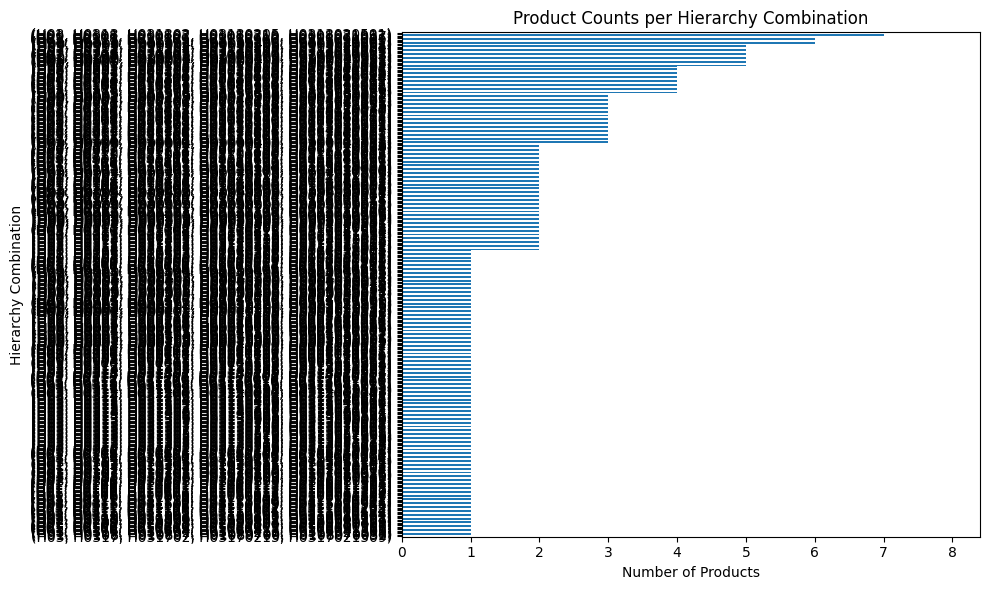

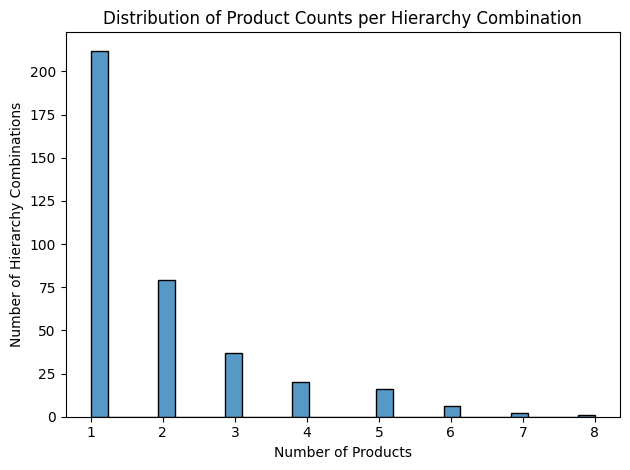

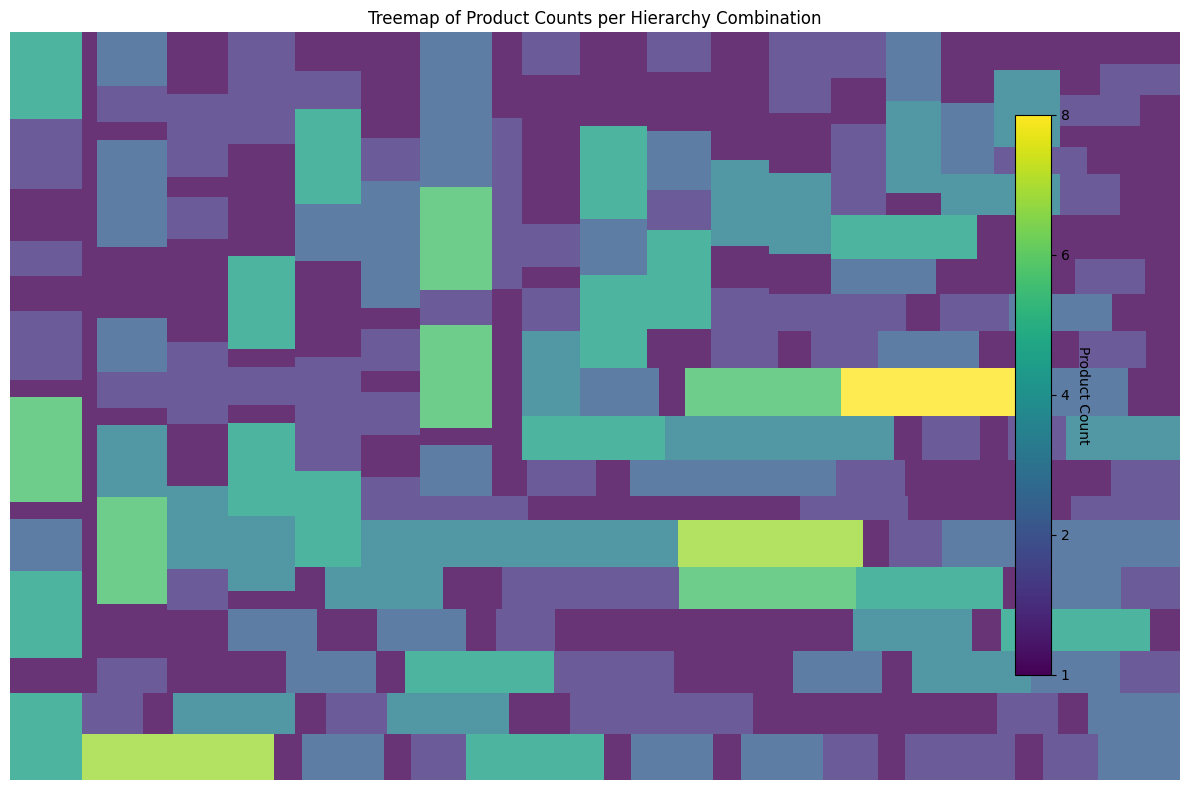

In [ ]:
# Print df
product_counts_per_hierarchy = product_hierarchy_df.groupby(['hierarchy1_id', 'hierarchy2_id', 'hierarchy3_id', 'hierarchy4_id', 'hierarchy5_id']).size()
print("\nProduct counts per hierarchy combination:")
print(product_counts_per_hierarchy)

# Bar chart
product_counts_per_hierarchy.sort_values().plot(kind='barh', figsize=(10, 6))
plt.xlabel("Number of Products")
plt.ylabel("Hierarchy Combination")
plt.title("Product Counts per Hierarchy Combination")
plt.tight_layout()
plt.show()

#Histogram
sns.histplot(product_counts_per_hierarchy, kde=False, bins=30) #Adjust bins as needed. kde=True will show a density plot.
plt.xlabel("Number of Products")
plt.ylabel("Number of Hierarchy Combinations")
plt.title("Distribution of Product Counts per Hierarchy Combination")
plt.tight_layout()
plt.show()

#Treemap
labels = []
sizes = []
for index, count in product_counts_per_hierarchy.items():
    l0, l1, l2, l3, l4 = index
    label = f"{l0}-{l1}-{l2}-{l3}-{l4} ({count})"
    labels.append("")
    sizes.append(count)

plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, alpha=.8, text_kwargs={'fontsize':0})
plt.title("Treemap of Product Counts per Hierarchy Combination")
plt.axis('off')
plt.tight_layout()
ax = plt.gca()
cmap = cm.viridis
norm = plt.Normalize(min(sizes), max(sizes))

for rect, label in zip(ax.patches, product_counts_per_hierarchy.items()):
    l0, l1, l2, l3, l4 = label[0]
    count = label[1]
    tooltip_text = f"{l0}-{l1}-{l2}-{l3}-{l4}: {count}"
    rect.set_picker(True)
    rect.set_facecolor(cmap(norm(count)))

def on_pick(event):
    if isinstance(event.artist, mpatches.Rectangle):
        rect = event.artist
        x, y = rect.get_xy()
        width, height = rect.get_width(), rect.get_height()
        ax.annotate(tooltip_text, (x + width/2, y + height/2), ha='center', va='center', fontsize=9, bbox=dict(facecolor='white', alpha=0.7))
        fig.canvas.draw_idle()

fig = plt.gcf()
fig.canvas.mpl_connect('pick_event', on_pick)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cax = fig.add_axes([0.85, 0.15, 0.03, 0.7])  # [left, bottom, width, height] -
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label("Product Count", rotation=270, labelpad=15)
ticks = np.linspace(min(sizes), max(sizes), 5)
cbar.set_ticks(ticks)
cbar.set_ticklabels([int(t) for t in ticks])

plt.show()



In [ ]:
duplicates = product_hierarchy_df.duplicated(subset=['hierarchy1_id', 'hierarchy2_id', 'hierarchy3_id', 'hierarchy4_id', 'hierarchy5_id'], keep=False)
#print("\nDuplicate Hierarchy combinations: ")
#print(product_hierarchy_df[duplicates])
duplicates = product_hierarchy_df.duplicated(subset=['hierarchy1_id', 'hierarchy2_id', 'hierarchy3_id', 'hierarchy4_id', 'hierarchy5_id'], keep=False)
duplicate_df = product_hierarchy_df[duplicates].sort_values(by=['hierarchy1_id', 'hierarchy2_id', 'hierarchy3_id', 'hierarchy4_id', 'hierarchy5_id'])

#pd.set_option('display.max_rows', None)  # Show all rows
#pd.set_option('display.max_columns', None)  # Show all columns
#print(duplicate_df)

# To see specific columns:
#print(duplicate_df[['hierarchy1_id','product_id']])
# Full List
# duplicate_df.to_csv("duplicate_hierarchy_combinations.csv", index=False)

In [ ]:
missing_values_df = product_hierarchy_df[product_hierarchy_df[['product_length', 'product_depth', 'product_width']].isnull().any(axis=1)].copy()

indices_to_delete = missing_values_df.index
product_hierarchy_df_cleaned = product_hierarchy_df.drop(indices_to_delete)

print("Original DataFrame shape:", product_hierarchy_df.shape)
print("Cleaned DataFrame shape:", product_hierarchy_df_cleaned.shape)

print("\nMissing values in cleaned DataFrame:")
print(product_hierarchy_df_cleaned[['product_length', 'product_depth', 'product_width']].isnull().sum())

Original DataFrame shape: (699, 10)
Cleaned DataFrame shape: (681, 10)

Missing values in cleaned DataFrame:
product_length    0
product_depth     0
product_width     0
dtype: int64


#### Action 1.3


1. Investigated if there is a strong relationship between cluster_id and the hierarchal categories by creating visuals.
    - The visuals show a significantly dominant bar for hierarchy1_id, displaying an association but does not indicate strength in relationship.
2. Applied Contingency Tables, Chi-Squared Test, and Cramér's V (for all subcategories):

| Metric                 | hierarchy1_id | hierarchy2_id | hierarchy3_id | hierarchy4_id | hierarchy5_id | Conclusions |
|------------------------|---------------|---------------|---------------|---------------|---------------|-------------|
| Chi-Squared Statistic | 3547.594045   | 3547.594045   | 3547.594045   | 3547.594045   | 3547.594045   |      Delete the rows       |
| P-value              | 0.000065      | 0.000065      | 0.000065      | 0.000065      | 0.000065      |      Delete the rows       |
| Cramér's V           | 0.232594      | 0.232594      | 0.232594      | 0.232594      | 0.232594      |      Delete the rows       |

   - The results above indicate that all IDs statistically *generally* suggest a stronger relationship. The p values across all IDs suggest all IDs are statistically significant. Cramer's suggest all IDs have a weak to moderate association.  
**Conclusion:** Remove these rows instead

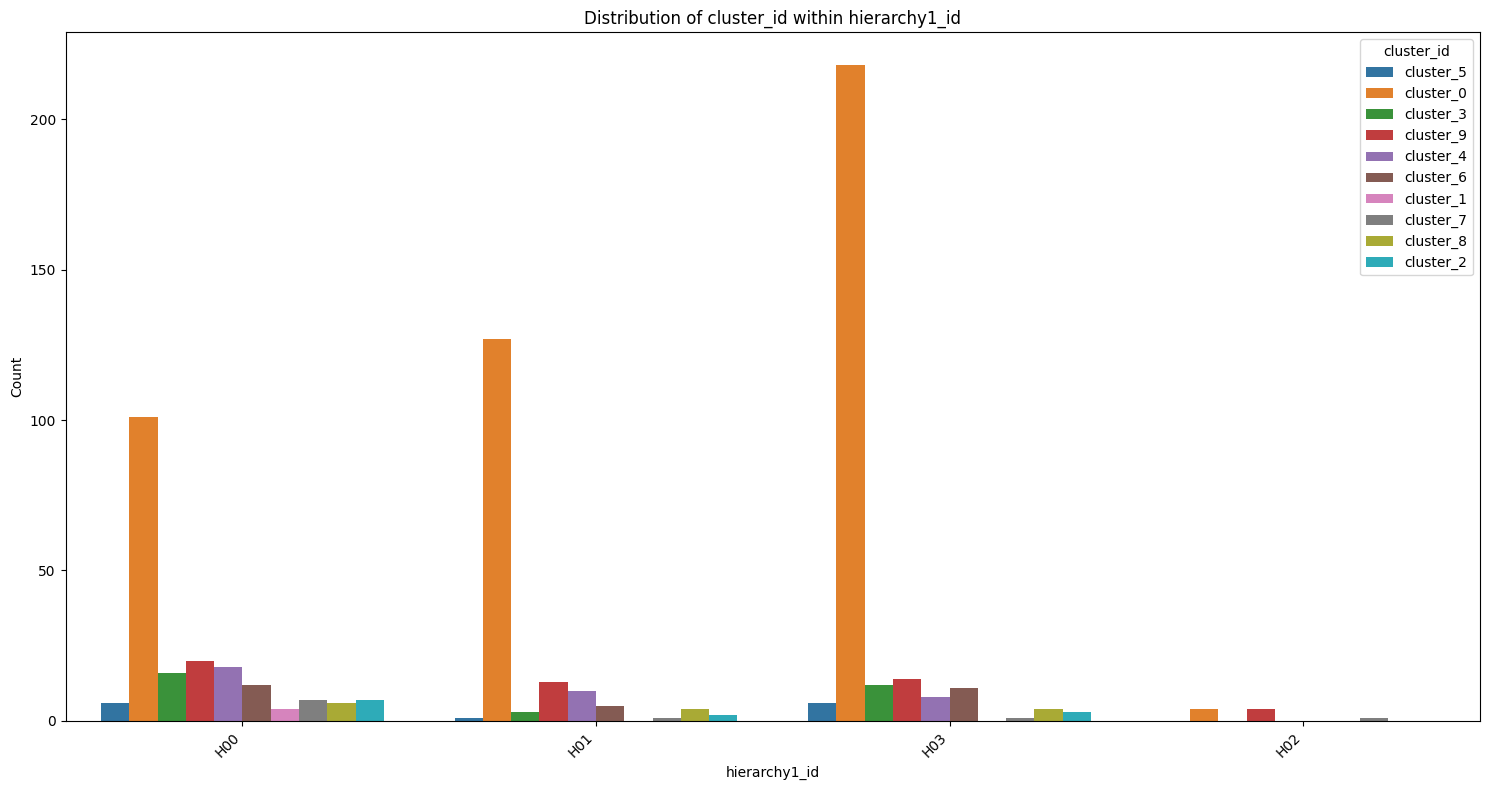

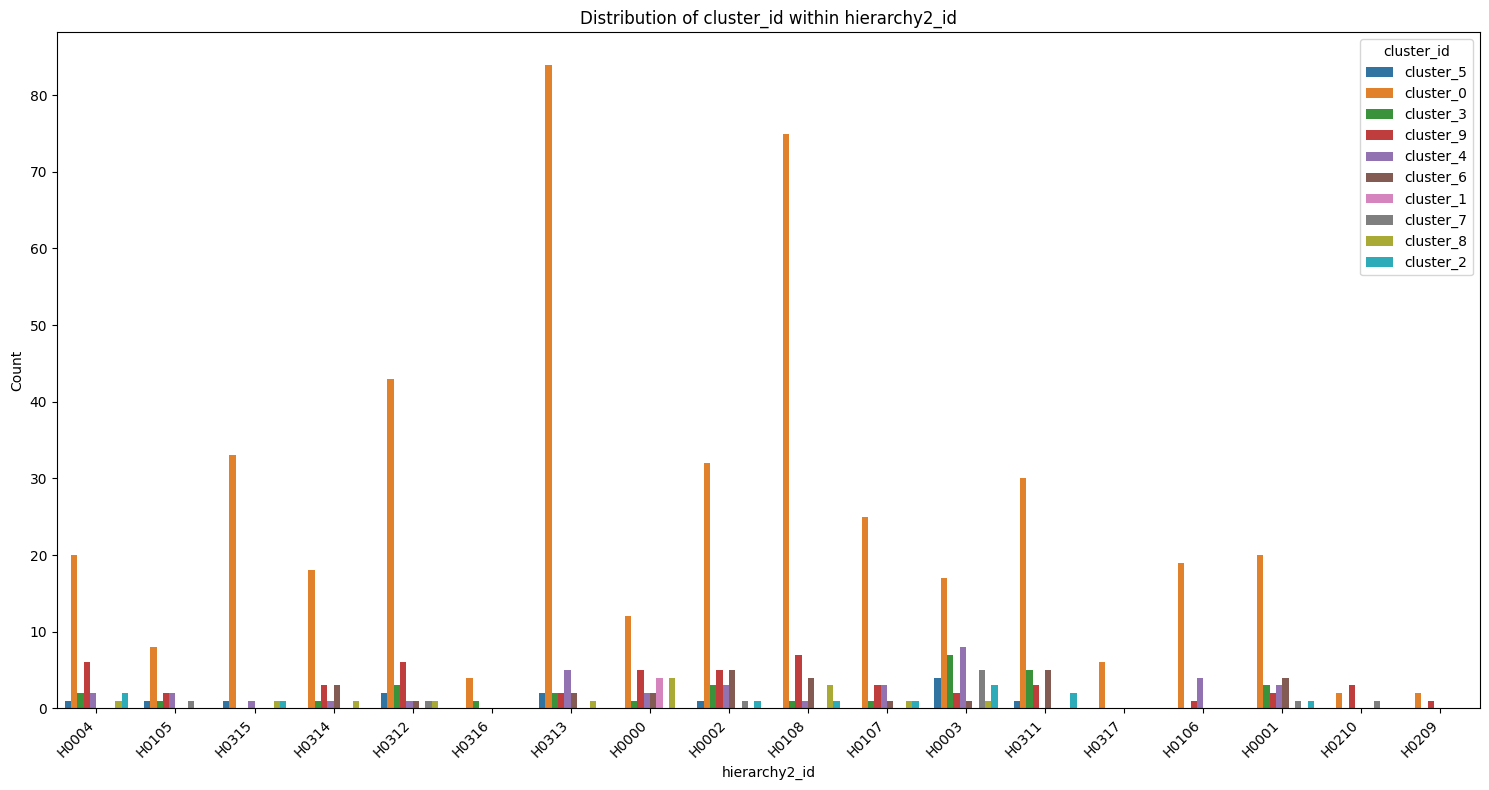

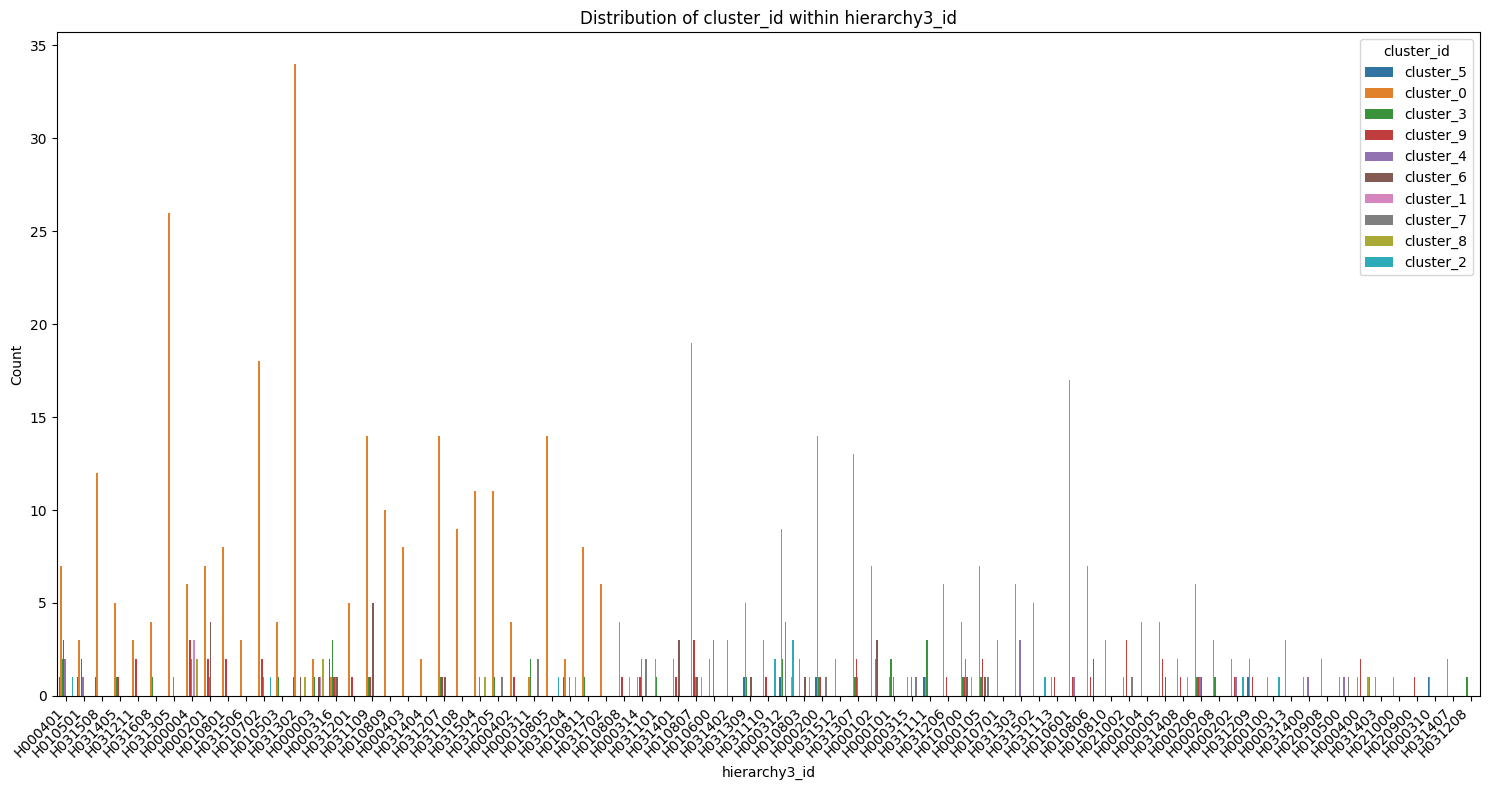

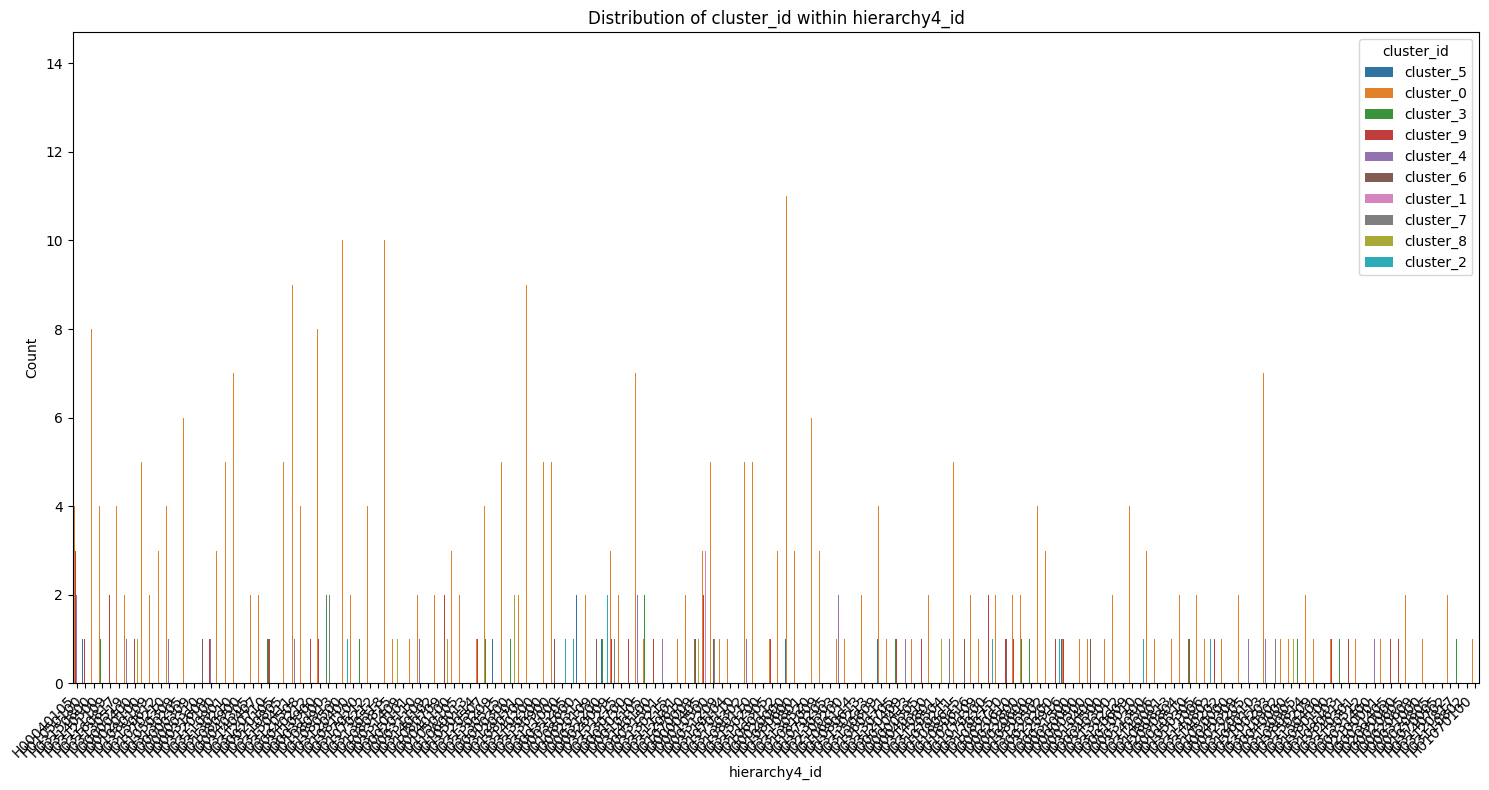

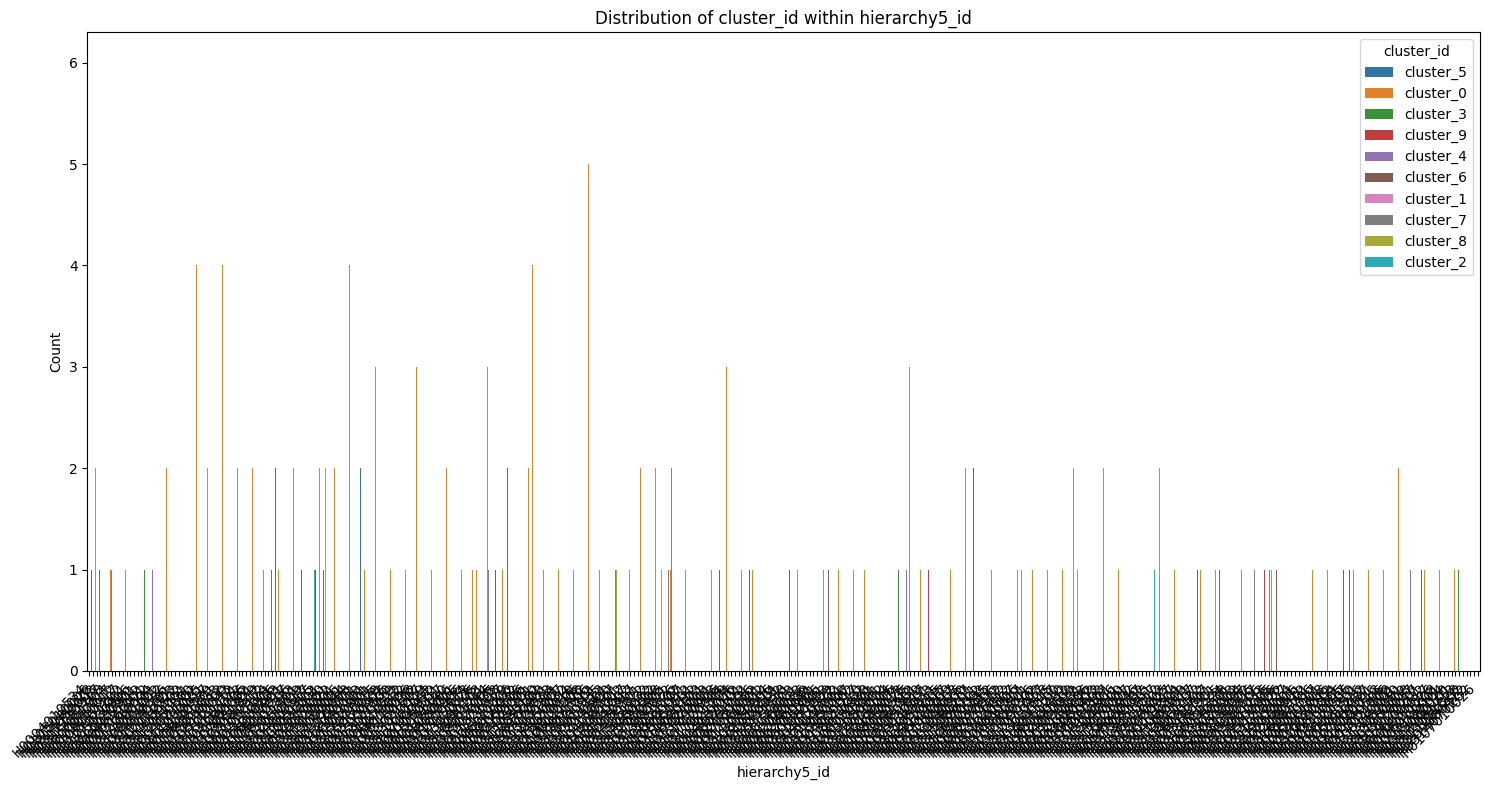

In [ ]:
# Visual Exploration with Grouped Bar Charts (for all subcategories):
hierarchy_levels = ['hierarchy1_id', 'hierarchy2_id', 'hierarchy3_id', 'hierarchy4_id', 'hierarchy5_id']  # Include hierarchy5_id

for level in hierarchy_levels:
    # Visual Exploration (Countplot):
    plt.figure(figsize=(15, 8))
    sns.countplot(x=level, hue='cluster_id', data=product_hierarchy_df)
    plt.xlabel(level)
    plt.ylabel("Count")
    plt.title(f"Distribution of cluster_id within {level}")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

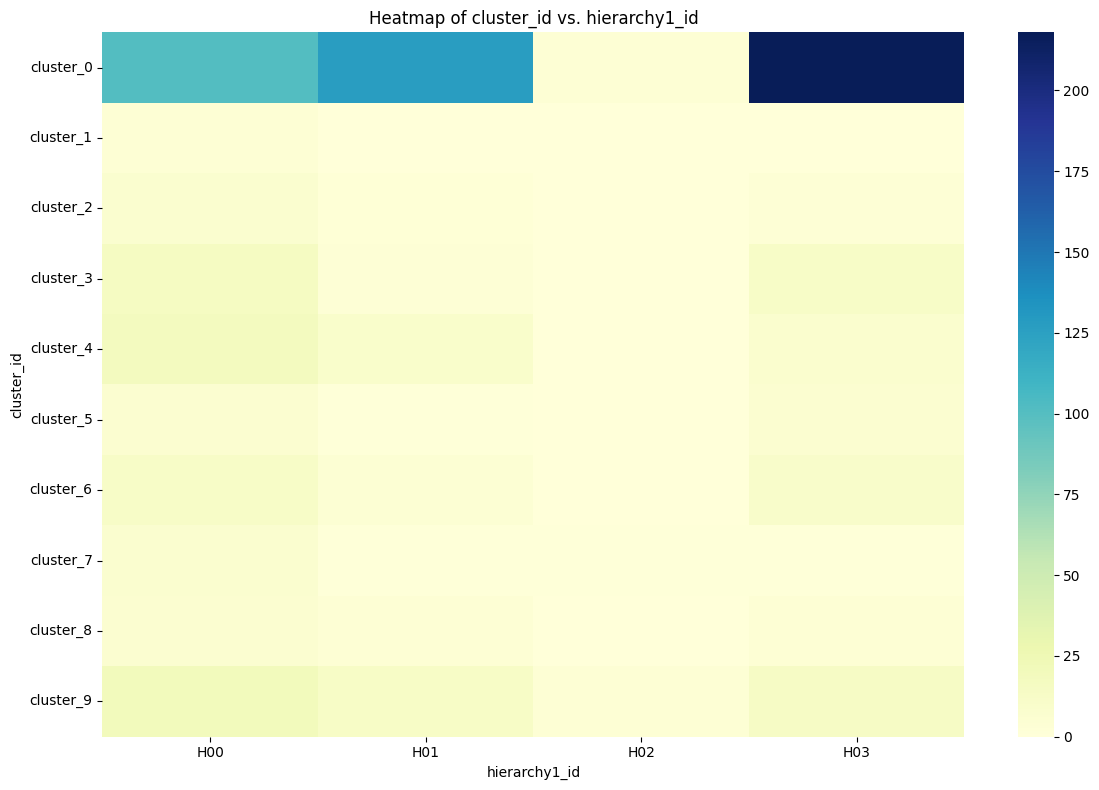

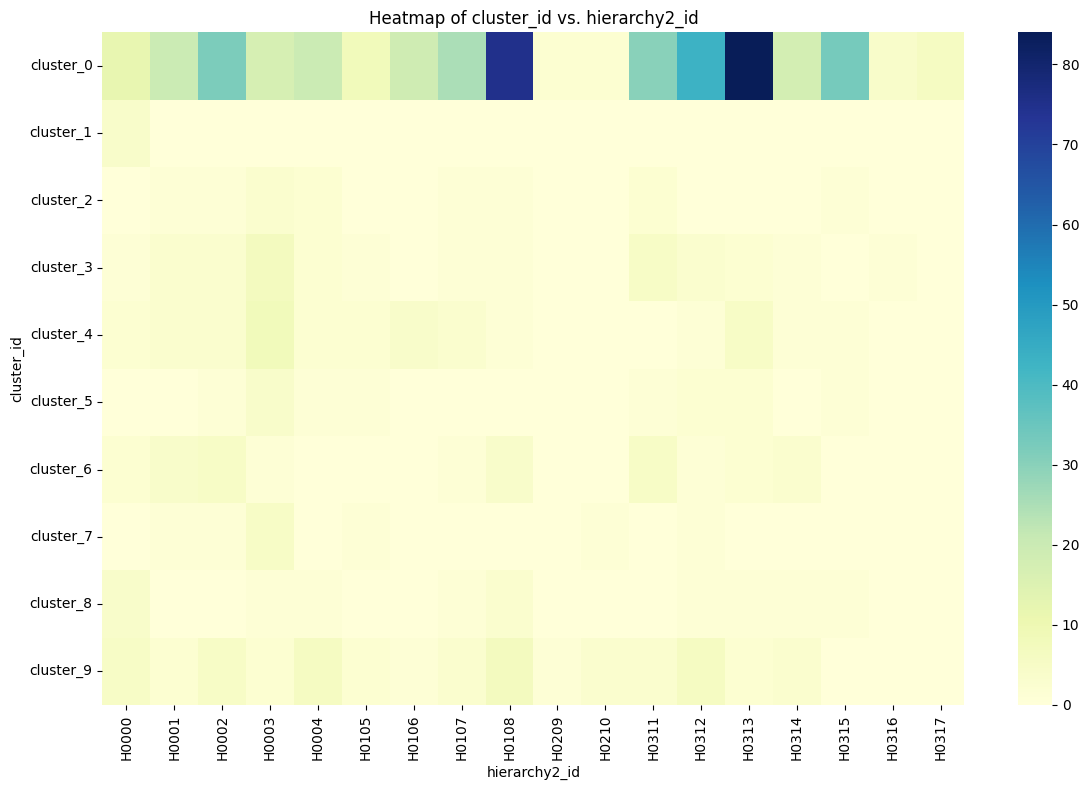

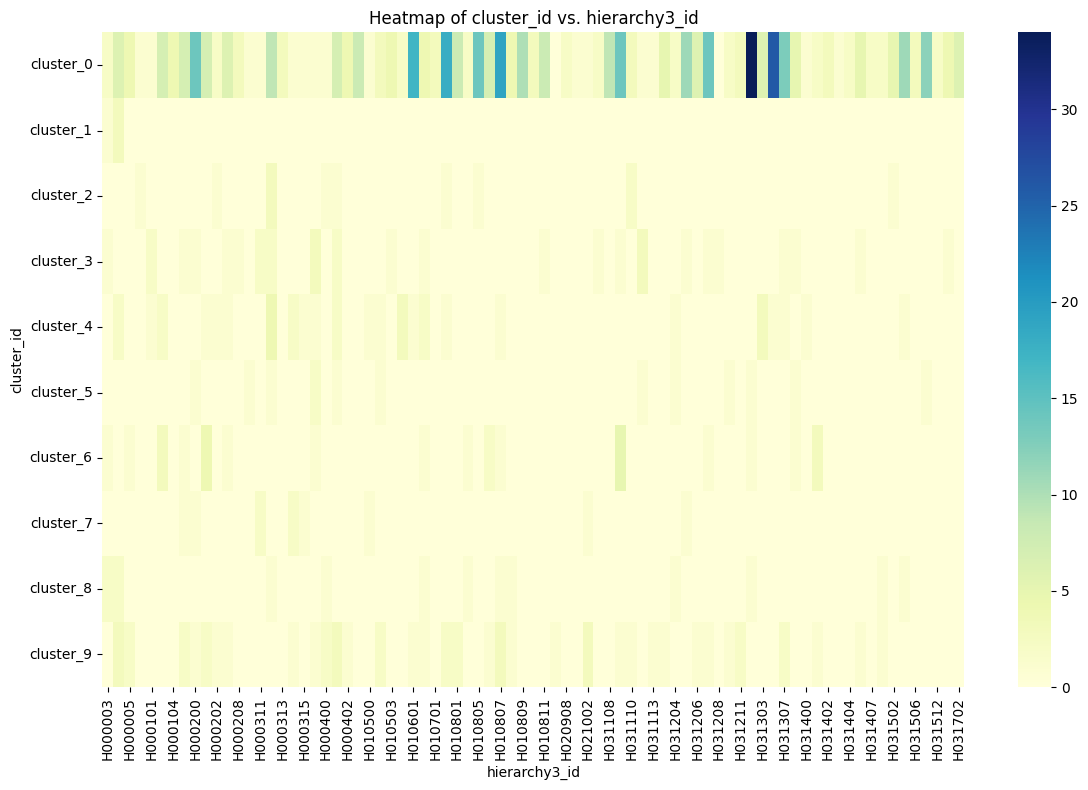

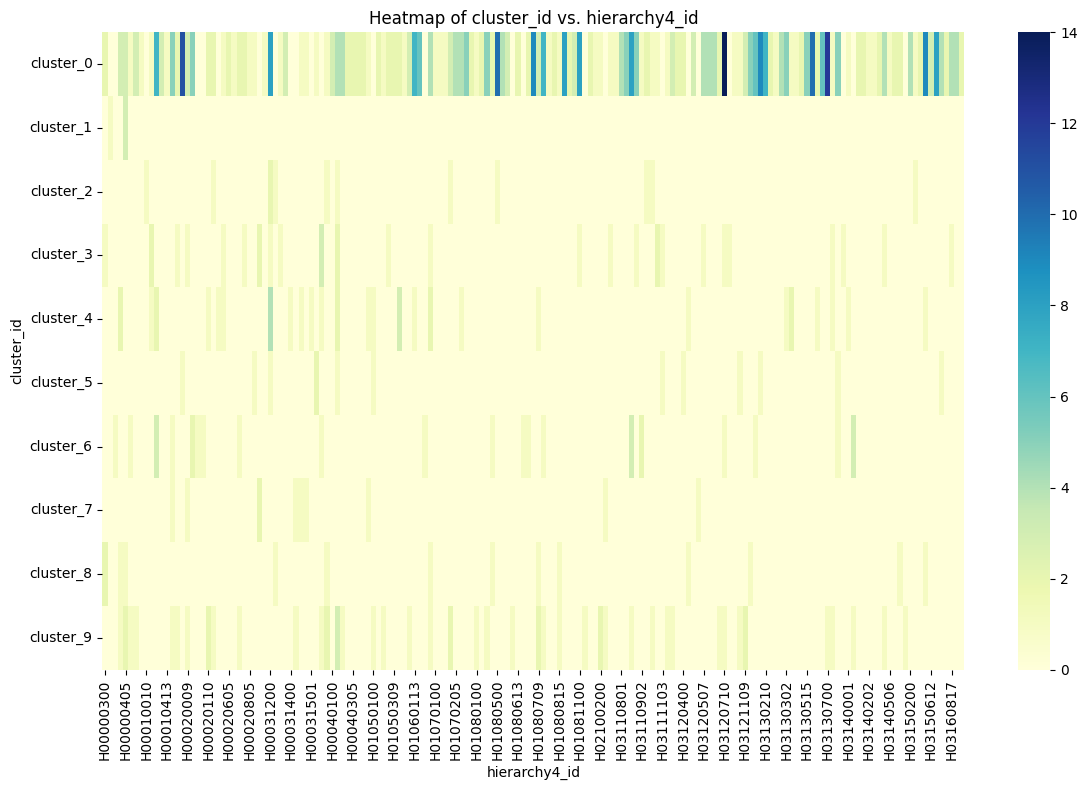

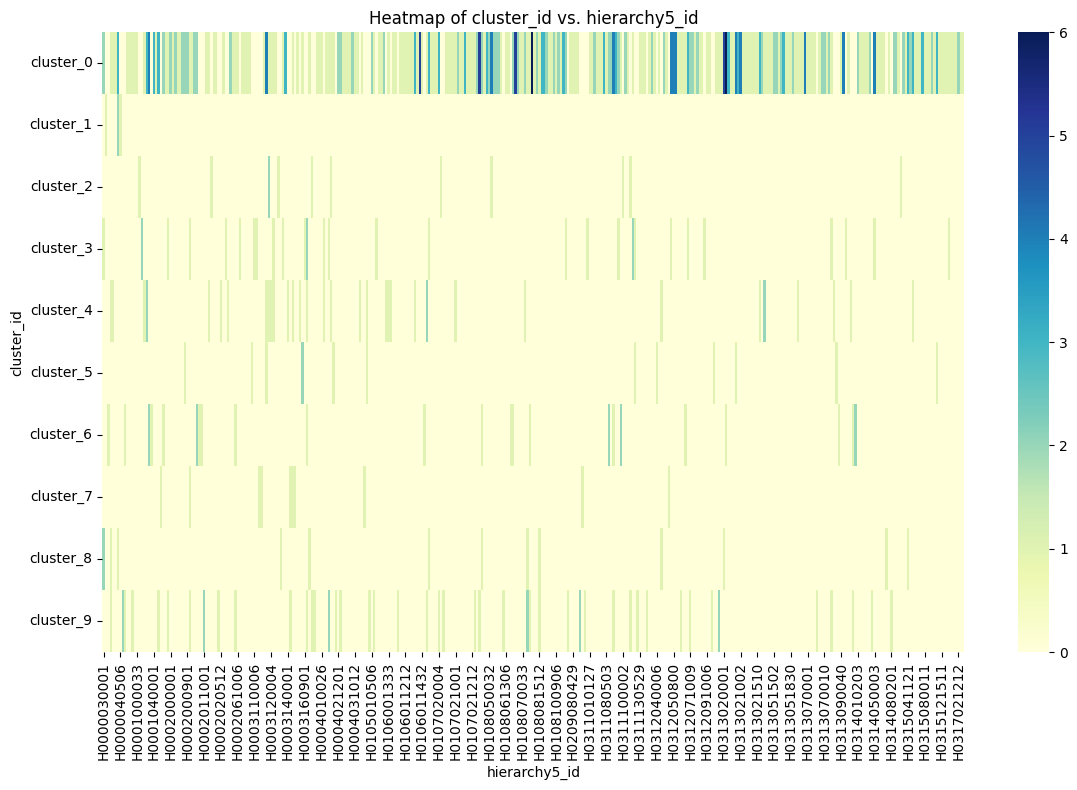

In [ ]:
for level in hierarchy_levels:
    # Heatmap of Contingency Table and Statistical Tests:
    contingency_table = pd.crosstab(product_hierarchy_df['cluster_id'], product_hierarchy_df[level])

    plt.figure(figsize=(12, 8))
    sns.heatmap(contingency_table, annot=False, cmap="YlGnBu")
    plt.title(f"Heatmap of cluster_id vs. {level}")
    plt.xlabel(level)
    plt.ylabel("cluster_id")
    plt.tight_layout()
    plt.show()

In [ ]:
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"\nChi-Squared Test for cluster_id and {level}:")
    print(f"Chi-Squared Statistic: {chi2}")
    print(f"P-value: {p}")


Chi-Squared Test for cluster_id and hierarchy5_id:
Chi-Squared Statistic: 3547.594045470628
P-value: 6.541986603478165e-05


In [ ]:
    def cramers_v(contingency_table):
        chi2 = chi2_contingency(contingency_table)[0]
        n = contingency_table.sum().sum()
        phi2 = chi2 / n
        r, k = contingency_table.shape
        phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
        rcorr = r - ((r-1)**2)/(n-1)
        kcorr = k - ((k-1)**2)/(n-1)
        return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

    cramers_v_value = cramers_v(contingency_table)
    print(f"Cramér's V for cluster_id and {level}: {cramers_v_value}")
    print("-" * 50)

Cramér's V for cluster_id and hierarchy5_id: 0.23259358064104643
--------------------------------------------------


In [ ]:
results = {}

for level in hierarchy_levels:

    # Chi-Squared Test and Cramér's V:
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    def cramers_v(contingency_table):
        chi2 = chi2_contingency(contingency_table)[0]
        n = contingency_table.sum().sum()
        phi2 = chi2 / n
        r, k = contingency_table.shape
        phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
        rcorr = r - ((r-1)**2)/(n-1)
        kcorr = k - ((k-1)**2)/(n-1)
        return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

    cramers_v_value = cramers_v(contingency_table)

    results[level] = {
        "Chi-Squared Statistic": chi2,
        "P-value": p,
        "Cramér's V": cramers_v_value
    }

    print(f"\nResults for cluster_id and {level}:")
    print(results[level])
    print("-" * 50)

missing_cluster_id = product_hierarchy_df[product_hierarchy_df['cluster_id'].isnull()]

for level in hierarchy_levels:
    print(f"\nMissing cluster_id counts by {level}:\n{missing_cluster_id[level].value_counts()}")

results_df = pd.DataFrame(results)

print("\nSummary of Results (Table):")
print(results_df)

print("\nSummary of Results:")
for level, metrics in results.items():
    print(f"\n{level}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")


Results for cluster_id and hierarchy1_id:
{'Chi-Squared Statistic': 3547.594045470628, 'P-value': 6.541986603478165e-05, "Cramér's V": 0.23259358064104643}
--------------------------------------------------

Results for cluster_id and hierarchy2_id:
{'Chi-Squared Statistic': 3547.594045470628, 'P-value': 6.541986603478165e-05, "Cramér's V": 0.23259358064104643}
--------------------------------------------------

Results for cluster_id and hierarchy3_id:
{'Chi-Squared Statistic': 3547.594045470628, 'P-value': 6.541986603478165e-05, "Cramér's V": 0.23259358064104643}
--------------------------------------------------

Results for cluster_id and hierarchy4_id:
{'Chi-Squared Statistic': 3547.594045470628, 'P-value': 6.541986603478165e-05, "Cramér's V": 0.23259358064104643}
--------------------------------------------------

Results for cluster_id and hierarchy5_id:
{'Chi-Squared Statistic': 3547.594045470628, 'P-value': 6.541986603478165e-05, "Cramér's V": 0.23259358064104643}
-----------

In [ ]:
product_hierarchy_df_cleaned_all = product_hierarchy_df_cleaned[product_hierarchy_df_cleaned['cluster_id'].notnull()].copy()

print("Dimensions-cleaned DataFrame shape:", product_hierarchy_df_cleaned.shape)
print("Final cleaned DataFrame shape:", product_hierarchy_df_cleaned_all.shape)
print("\nMissing values in final cleaned DataFrame:")
print(product_hierarchy_df_cleaned_all[['cluster_id']].isnull().sum())

Dimensions-cleaned DataFrame shape: (681, 10)
Final cleaned DataFrame shape: (633, 10)

Missing values in final cleaned DataFrame:
cluster_id    0
dtype: int64


#### Action 1.4

In [ ]:
city_names_df_cleaned = city_names_df.dropna(subset=['city_id', 'city_name']).copy()
print("Original DataFrame shape:", city_names_df.shape)
print("Cleaned DataFrame shape:", city_names_df_cleaned.shape)

print("\nMissing values in cleaned DataFrame:")
print(city_names_df_cleaned[['city_id', 'city_name']].isnull().sum())


Original DataFrame shape: (144, 2)
Cleaned DataFrame shape: (37, 2)

Missing values in cleaned DataFrame:
city_id      0
city_name    0
dtype: int64


### Identify & Export cleaned dataframes


#### Current list of all dataframes created

| Variable                          | Type       | Data/Info                                             |
|------------------------------------|-----------|-------------------------------------------------------|
| city_names_df                      | DataFrame | Raw Upload   |
| city_names_df_cleaned              | DataFrame | Missing values removed          |
| df                                 | DataFrame | Dict of all DFs  |
| missing_values_df                  | DataFrame | DF for investigating in Action 1.3      |
| product_hierarchy_df               | DataFrame | Raw Upload |
| product_hierarchy_df_cleaned       | DataFrame | Hiearchy missing values cleaned |
| product_hierarchy_df_cleaned_all   | DataFrame | Missing cluster IDs removed |
| product_names_df                   | DataFrame | Raw Upload  |
| sales_df                           | DataFrame | Raw Upload   |
| sales_df_updated                   | DataFrame | Removed missing values   |
| store_cities_df                    | DataFrame | Raw Upload  |
| store_names_df                     | DataFrame | Raw Upload  |



In [ ]:
%whos DataFrame

Variable                           Type         Data/Info
---------------------------------------------------------
city_names_df                      DataFrame        city_id   city_name\n<...>n\n[144 rows x 2 columns]
city_names_df_cleaned              DataFrame       city_id         city_n<...>   C037          Tallinn 
df                                 DataFrame        product_id           <...>n\n[699 rows x 2 columns]
missing_values_df                  DataFrame        product_id  product_l<...>H02090804   H0209080422  
product_hierarchy_df               DataFrame        product_id  product_l<...>\n[699 rows x 10 columns]
product_hierarchy_df_cleaned       DataFrame        product_id  product_l<...>\n[681 rows x 10 columns]
product_hierarchy_df_cleaned_all   DataFrame        product_id  product_l<...>\n[633 rows x 10 columns]
product_names_df                   DataFrame        product_id           <...>n\n[699 rows x 2 columns]
sales_df                           DataFrame        

#### Save & Download

In [ ]:
# Redacted
drive_folder = "/content/drive/My Drive/Cleaned DataFrames: Missing Values Cleaned/"


os.makedirs(drive_folder, exist_ok=True)

sales_csv_path = os.path.join(drive_folder, "sales_df_updated.csv")
product_hierarchy_csv_path = os.path.join(drive_folder, "product_hierarchy_df_cleaned_all.csv")
city_names_csv_path = os.path.join(drive_folder, "city_names_df_cleaned.csv")

sales_df_updated.to_csv(sales_csv_path, index=False)
product_hierarchy_df_cleaned_all.to_csv(product_hierarchy_csv_path, index=False)
city_names_df_cleaned.to_csv(city_names_csv_path, index=False)

print(f"Files saved to Google Drive:\n{sales_csv_path}\n{product_hierarchy_csv_path}\n{city_names_csv_path}")


Files saved to Google Drive:
/content/drive/My Drive/Cleaned DataFrames: Missing Values Cleaned/sales_df_updated.csv
/content/drive/My Drive/Cleaned DataFrames: Missing Values Cleaned/product_hierarchy_df_cleaned_all.csv
/content/drive/My Drive/Cleaned DataFrames: Missing Values Cleaned/city_names_df_cleaned.csv


# Formatting Data

## Standardizing Date Formats


In [ ]:
file_id = "REDACTED"
output_path = "sales_1_date_formatted.csv"
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_path, quiet=False)
sales_to_be_date_formatted = pd.read_csv(output_path)

if "date" in sales_to_be_date_formatted.columns:
    sales_to_be_date_formatted["date"] = pd.to_datetime(sales_to_be_date_formatted["date"], errors="coerce", dayfirst=False)
    sales_to_be_date_formatted["date"] = sales_to_be_date_formatted["date"].dt.strftime("%m/%d/%y")

cleaned_file_path = "sales_1_date_formatted.csv"
sales_to_be_date_formatted.to_csv(cleaned_file_path, index=False)

print(f"Full dataset saved with standardized 'date' column: {cleaned_file_path}")

#Redacted
drive_folder = "/content/drive/My Drive/Redacted"

os.makedirs(drive_folder, exist_ok=True)
cleaned_file_path = os.path.join(drive_folder, "sales_1_date_formatted.csv")
sales_to_be_date_formatted.to_csv(cleaned_file_path, index=False)

print(f"File saved to Google Drive: {cleaned_file_path}")

## Numerical Consistency

In [ ]:
import pandas as pd
import os
#Redacted
drive_folder = "/content/drive/My Drive/Redacted"


file_names = ["city_names_1", "product_hierarchy_1", "sales_1_date_formatted"]

for file_name in file_names:
    input_file_path = os.path.join(drive_folder, f"{file_name}.csv")
    output_file_path = os.path.join(drive_folder, f"{file_name}_numbers_cleaned.csv")

    df = pd.read_csv(input_file_path)

    num_cols = df.select_dtypes(include=['number']).columns

    for col in num_cols:
        df[col] = pd.to_numeric(df[col], errors="coerce")
        df[col] = df[col].round(2)

    df.to_csv(output_file_path, index=False)

    print(f"✅ Cleaned file saved: {output_file_path}")


# Duplicates

## Finding Duplicates

### Results
After searching all 6 csv's, There does not exist any duplicate rows. Perhaps in the previous cleaning procedures, duplicates might have been removed unintentionally.  

| File Name                                  | Total Rows | Duplicate Rows |
|--------------------------------------------|------------|---------------|
| city_names_1_numbers_cleaned.csv           | 37         | 0             |
| product_hierarchy_1_numbers_cleaned.csv    | 633        | 0             |
| sales_1_date_formatted_numbers_cleaned.csv | 49,289     | 0             |
| product_names.csv                          | 699        | 0             |
| store_cities.csv                           | 144        | 0             |
| store_names.csv                            | 144        | 0             |


In [ ]:
# For Raw CSVs
drive_path = "/content/drive/My Drive/Redacted"

file_names = [
    "product_names.csv",
    "store_cities.csv",
    "store_names.csv"
]

# For Previously Cleaned CSVs
#drive_path = "/content/drive/My Drive/Redacted"

#file_names = [
 #   "city_names_1_numbers_cleaned.csv",
  #  "product_hierarchy_1_numbers_cleaned.csv",
   # "sales_1_date_formatted_numbers_cleaned.csv"
#]

def check_duplicates(file_path):
    df = pd.read_csv(file_path)
    total_rows = df.shape[0]
    duplicate_rows = df.duplicated().sum()

    print(f"File: {os.path.basename(file_path)}")
    print(f"Total Rows: {total_rows}")
    print(f"Duplicate Rows: {duplicate_rows}")
    print("-" * 40)

    return duplicate_rows

for file_name in file_names:
    file_path = os.path.join(drive_path, file_name)
    check_duplicates(file_path)



File: product_names.csv
Total Rows: 699
Duplicate Rows: 0
----------------------------------------
File: store_cities.csv
Total Rows: 144
Duplicate Rows: 0
----------------------------------------
File: store_names.csv
Total Rows: 144
Duplicate Rows: 0
----------------------------------------


# Standardizing Text

## Identifying Leading Extra Spaces

### Results

Leading/Trailing Spaces exist in 3 spreadsheets - in which one of them have multiple spaces.

**product_names.csv**

| File Name        | Column        | Leading/Trailing Spaces | Multiple Spaces |
|------------------|--------------|-------------------------|----------------|
| product_names.csv | product_name | 1                       | 0              |

**store_cities.csv**

| File Name       | Status               |
|-----------------|----------------------|
| store_cities.csv | ✅ No extra spaces found |

**store_names.csv**

| File Name       | Column      | Leading/Trailing Spaces | Multiple Spaces |
|-----------------|------------|-------------------------|----------------|
| store_names.csv | store_name | 4                       | 2              |

**city_names_1_numbers_cleaned.csv**

| File Name                        | Column    | Leading/Trailing Spaces | Multiple Spaces |
|----------------------------------|-----------|-------------------------|----------------|
| city_names_1_numbers_cleaned.csv | city_name | 9                       | 0              |


**product_hierarchy_1_numbers_cleaned.csv**

| File Name                          | Status               |
|------------------------------------|----------------------|
| product_hierarchy_1_numbers_cleaned.csv | ✅ No extra spaces found |

**sales_1_date_formatted_numbers_cleaned.csv**

| File Name                              | Status               |
|----------------------------------------|----------------------|
| sales_1_date_formatted_numbers_cleaned.csv | ✅ No extra spaces found |


In [ ]:
# For Raw CSVs
drive_path = "/content/drive/My Drive/Redacted"

file_names = [
    "product_names.csv",
    "store_cities.csv",
    "store_names.csv"
]

# For Previously Cleaned CSVs
drive_path = "/content/drive/My Drive/Redacted"

file_names1 = [ # Remove the 1 when ready and put it in the other file_names
    "city_names_1_numbers_cleaned.csv",
    "product_hierarchy_1_numbers_cleaned.csv",
    "sales_1_date_formatted_numbers_cleaned.csv"
]

def check_extra_spaces(file_path):
    df = pd.read_csv(file_path, dtype=str)
    extra_spaces_found = False

    print(f"Checking: {os.path.basename(file_path)}")

    for col in df.columns:

        leading_trailing = df[col].str.startswith(" ") | df[col].str.endswith(" ")


        multiple_spaces = df[col].str.contains(r"\s{2,}", regex=True, na=False)

        if leading_trailing.sum() > 0 or multiple_spaces.sum() > 0:
            extra_spaces_found = True
            print(f"  Column: {col}")
            print(f"    Leading/Trailing Spaces: {leading_trailing.sum()}")
            print(f"    Multiple Spaces: {multiple_spaces.sum()}")

    if not extra_spaces_found:
        print("  ✅ No extra spaces found")

    print("-" * 50)

for file_name in file_names:
    file_path = os.path.join(drive_path, file_name)
    check_extra_spaces(file_path)


Checking: city_names_1_numbers_cleaned.csv
  Column: city_name
    Leading/Trailing Spaces: 9
    Multiple Spaces: 0
--------------------------------------------------
Checking: product_hierarchy_1_numbers_cleaned.csv
  ✅ No extra spaces found
--------------------------------------------------
Checking: sales_1_date_formatted_numbers_cleaned.csv
  ✅ No extra spaces found
--------------------------------------------------


## Removing Leading / Trailing Spaces / Multiple Spaces

In [ ]:
# Redacted
drive_path = "/content/drive/My Drive/Redacted"

file_mappings = {
    "product_names.csv": "product_names_3.csv",
    "city_names_1_numbers_cleaned.csv": "city_names_3.csv",
    "store_names.csv": "store_names_3.csv"
}


def clean_spaces(df):
    return df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

def clean_multiple_spaces(df):
    return df.applymap(lambda x: ' '.join(x.split()) if isinstance(x, str) else x)

for original_file, new_file in file_mappings.items():
    file_path = os.path.join(drive_path, original_file)
    new_file_path = os.path.join(drive_path, new_file)

    try:
        df = pd.read_csv(file_path, dtype=str)
        print(f"🔹 Processing: {original_file}")

        df = clean_spaces(df)

        if original_file == "store_names.csv":
            df = clean_multiple_spaces(df)

        df.to_csv(new_file_path, index=False)
        print(f"✅ Cleaned and saved: {new_file}")

    except FileNotFoundError:
        print(f"❌ Error: File {original_file} not found. Skipping...")
    except Exception as e:
        print(f"❌ Error processing {original_file}: {e}")

print("\n🎉 All applicable files have been processed successfully!")

🔹 Processing: product_names.csv
✅ Cleaned and saved: product_names_3.csv
🔹 Processing: city_names_1_numbers_cleaned.csv
✅ Cleaned and saved: city_names_3.csv
🔹 Processing: store_names.csv
✅ Cleaned and saved: store_names_3.csv

🎉 All applicable files have been processed successfully!


<ipython-input-22-cc820ca1cbaa>:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
<ipython-input-22-cc820ca1cbaa>:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
<ipython-input-22-cc820ca1cbaa>:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
<ipython-input-22-cc820ca1cbaa>:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df.applymap(lambda x: ' '.join(x.split()) if isinstance(x, str) else x)
